In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import numpy as np
import os
from testLibs import *

In [5]:
with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly.json', 'r') as f1:
    featOnly = json.load(f1)

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_Pdesc.json', 'r') as f2:
    featOnlyPdesc = json.load(f2)

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_Sdesc.json', 'r') as f3:
    featOnlySdesc = json.load(f3)

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_Pdesc_Sdesc.json', 'r') as f4:
    featOnlyPdescSdesc = json.load(f4)

with open('../data/tablesJSON/allTables_free.json', 'r') as f5:
    MznResults = json.load(f5)

In [6]:
mzn_df = mznResultsFlattener(MznResults)

llm_df = ResultsFlattener(featOnly)
llmPD_df = ResultsFlattener(featOnlyPdesc)
llmSD_df = ResultsFlattener(featOnlySdesc)
llmPDSD_df = ResultsFlattener(featOnlyPdescSdesc)

scored_df = scoreComputation(mzn_df)

/home/vro5/Coding/AgenticSolvers/test/notebooks/testLibs.py:109: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg = valid_objs.groupby(['Problem', 'Instance']).apply(best_worst).reset_index()


In [7]:
# --- Compute scores for different LLMResults variants ---
llm_summary = compute_llm_scores(llm_df, scored_df)
print('Top LLM Summary:')
display(llm_summary.sort_values('LLM_TotalScore', ascending=False))

llmPD_summary = compute_llm_scores(llmPD_df, scored_df)
print('Top+Desc LLM Summary:')
display(llmPD_summary.sort_values('LLM_TotalScore', ascending=False))

llmSD_summary = compute_llm_scores(llmSD_df, scored_df)
print('Top+SDesc LLM Summary:')
display(llmSD_summary.sort_values('LLM_TotalScore', ascending=False))

llmPDSD_summary = compute_llm_scores(llmPDSD_df, scored_df)
print('Top+SDesc+PDesc LLM Summary:')
display(llmPDSD_summary.sort_values('LLM_TotalScore', ascending=False))

# --- Save all LLM scored variants  DataFrame to CSV ---
llm_summary.to_csv('../data/DFs/top3Scored/llm_featOnly.csv', index=False)
llmPD_summary.to_csv('../data/DFs/top3Scored/llm_featOnlyPDesc.csv', index=False)
llmSD_summary.to_csv('../data/DFs/top3Scored/llm_featOnlySDesc.csv', index=False)
llmPDSD_summary.to_csv('../data/DFs/top3Scored/llm_featOnlySDescPDesc.csv', index=False)

Top LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,82.25976,100,0.822598


Top+Desc LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,83.289246,99,0.841306


Top+SDesc LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,82.994278,100,0.829943


Top+SDesc+PDesc LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,83.731582,100,0.837316


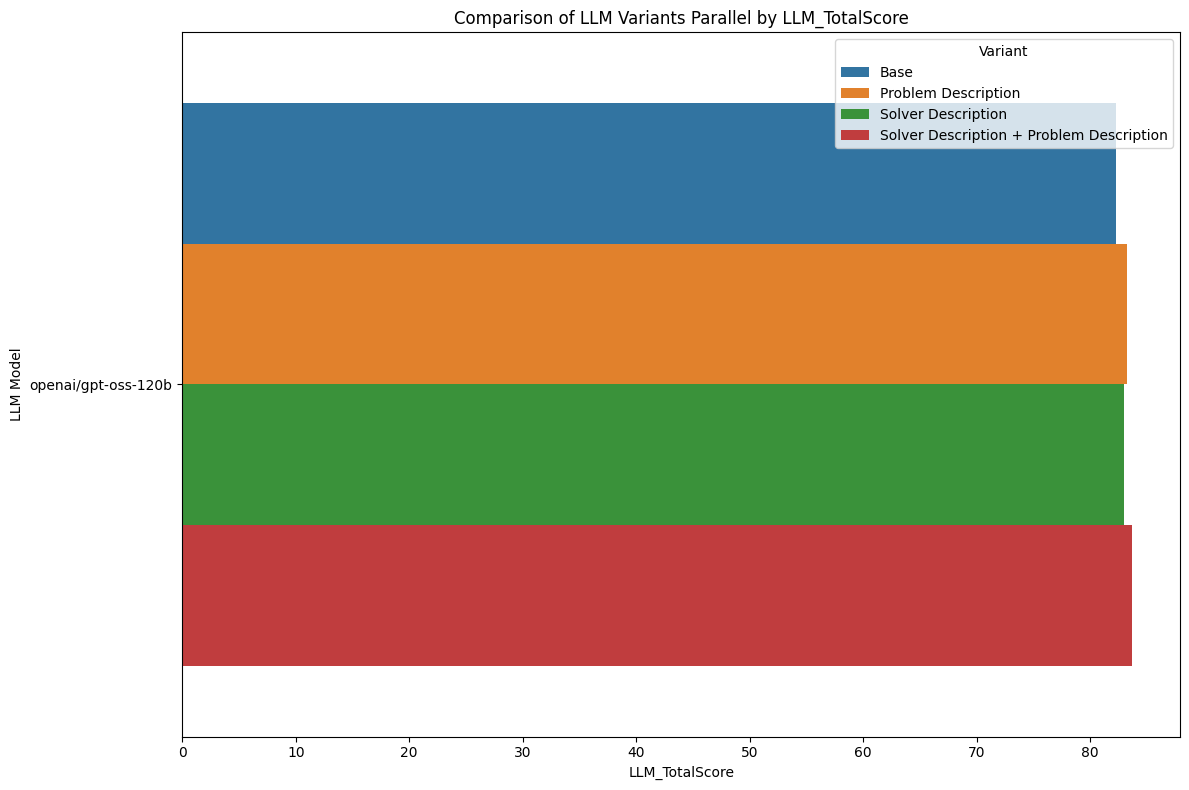

In [ ]:
plot_llm_variant_comparison(
    [llm_summary, llmPD_summary, llmSD_summary, llmPDSD_summary],
    ['Features only', 'Features only + Problem Description', 'Features only + Solver Description', 'Features only + Solver Description + Problem Description'],
    'LLM_TotalScore'
)